# Classification de données de cancer du sein avec un perceptron multi-couches
Dans ce notebook nous effectuerons l'apprentissage de données de cancer du sein pour une classification en deux classes. Le package utilisé dans ce TP pour implémenter le perceptron multi-couche est ***scikit-learn***.

Pour le bon fonctionnement de ce notebook, les packages suivants sont nécessaires:
1. *numpy*
2. *sckit-learn*

## Chargement des données et exploration
### Chargement des données
Les données que nous utiliserons existent déjà dans le package ***scikit-learn***. Pour les charger, nous utiliserons la fonction `load_breast_cancer`. On aurait très bien pu utiliser un fichier csv et les importer avec le package ***pandas***.

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# Chargement des données pour la classification du cancer du sein
cancer_data = load_breast_cancer()

print("La base de données chargée est de type : ", type(cancer_data))

La base de données chargée est de type :  <class 'sklearn.utils._bunch.Bunch'>


### Exploration des données
Cette étape permet de pouvoir analyser les données (répartition des classes, taille, ...) afin d'avoir une idée un peu plus précise de qu'on manipule.
Dans cet exemple, nous allons:
- Afficher la taille de la base de données
- Le nombre de classes 
- Le nombre d'échantillons dans chaque classe

Pour faire un apprentissage, on a besoin d'avoir les données d'entrée mais également les données de sortie qui sont dans cet exemple les différentes classes. Ces deux données sont accessibles grâce aux clés `data` et `target` dans la base de données chargée.

In [3]:
# Taille des données de cancer
print("Taille des données chargées: ", cancer_data['data'].shape)

Taille des données chargées:  (569, 30)


In [4]:
# Charger séparément les entrées et les sorties des données pour préparer l'apprentissage
features = cancer_data['data']
classes = cancer_data['target']

# Afficher les différentes classes
v_classes_uniques = np.unique(classes)
print(len(v_classes_uniques), "Différentes classes : ", v_classes_uniques)

# Afficher la taille des données de chacune des classes
for classe in v_classes_uniques:
    print("La classe ", classe, "contient ", np.sum(classes==classe), "échantillons.")

2 Différentes classes :  [0 1]
La classe  0 contient  212 échantillons.
La classe  1 contient  357 échantillons.


## Préparation des données pour l'apprentissage
### Création des ensembles d'apprentissage et de test
Avant d'effectuer l'apprentissage, il faut diviser notre base de données en 2 :
1. un ensemble d'apprentissage qui servira à entraîner le réseau de neurones
C'est sur cet ensemble qu'on optimise la fonction de perte afin de minimier l'erreur de prédiction.
2. un ensemble de test qui servira à évaluer la qualité de notre apprentissage
Pour séparer notre ensemble de données dans ce sens, la fonction `train_test_split` est bien adaptée. Il suffit de lui indiquer la répartition qu'on souhaite en terme de ratio entre l'ensemble d'apprentissage et celui de test grâce au paramètre `train_size`.

In [5]:
features_train, features_test, classes_train, classes_test = train_test_split(
    features, classes, train_size=0.75, random_state=42,
)

# Afficher les tailles des deux ensembles
print("Taille de l'ensemble d'apprentissage : ", features_train.shape)
print("Taille de l'ensemble de test : ", features_test.shape)

Taille de l'ensemble d'apprentissage :  (426, 30)
Taille de l'ensemble de test :  (143, 30)


### Normalisation des données 
La normalisation des données est bien souvent une étape indispensable pour faciliter l'apprentissage. Cette opération est faite sur l'ensemble d'apprentisage et ensuite appliquer à l'ensemble de test et à chaque échantillon pour lequel on aimerait prédire la classe.

Plusieurs normalisations sont possibles:
- la normalisation centrée réduite
- l'utilisation de la norme L1
- l'utilisation de la norme L2
- ...

Nous utilisons ici la fonction `StandardScaler` dans `sklearn.prepocesing` pour faire une normalisation centrée réduite. On peut également utiliser la fonction `normalize` en passant en paramètre le type de normalisation qu'on souhaite effectuer.

La normalisation ne change absolument pas la taille des échantillons mais leurs valeurs. Pour le vérifier, nous avons afficher les valeurs minimales et maximales des variances et des moyennes avant et après la normalisation centrée réduite. 

In [6]:
# Normalisation des données avant l'apprentissage
scaler = StandardScaler()

# La normalisation se fait uniquement sur les données d'apprentissage
scaler.fit(features_train)
StandardScaler(copy=True , with_mean=True , with_std=True)

# La normalisation ne modifie pas la taille des données mais leurs valeurs
# Afficher les valeurs minimales et maximales de la variance et de la moyenne des données après la normalisations
variances_train = np.std(features_train, 0)
moyennes_train = np.mean(features_train, 0)

print("Avant l'opération de normalisation")
print("Taille de l'ensemble d'apprentissage : ", features_train.shape)

print("Variances des données d'apprentissage : ", [np.round(np.min(variances_train), 3), 
                                                   np.round(np.max(variances_train), 3)] )
print("Moyennes des données d'apprentissage : ", [np.round(np.min(moyennes_train)), 
                                                  np.round(np.max(moyennes_train), 3)])

# Application du modèle de normalisation aux données de test et d'apprentissage
features_train = scaler.transform (features_train)
features_test = scaler.transform (features_test)

# La normalisation ne modifie pas la taille des données mais leurs valeurs
variances_train = np.std(features_train, 0)
moyennes_train = np.mean(features_train, 0)

print("\nAprès l'opération de normalisation")
print("Taille de l'ensemble d'apprentissage : ", features_train.shape)

# Afficher les valeurs minimales et maximales de la variance et de la moyenne des données après la normalisations
print("Variances des données d'apprentissage : ", [np.round(np.min(variances_train), 3), 
                                                   np.round(np.max(variances_train), 3)] )
print("Moyennes des données d'apprentissage : ", [np.round(np.min(moyennes_train)), 
                                                  np.round(np.max(moyennes_train), 3)])

Avant l'opération de normalisation
Taille de l'ensemble d'apprentissage :  (426, 30)
Variances des données d'apprentissage :  [0.003, 564.58]
Moyennes des données d'apprentissage :  [0.0, 873.721]

Après l'opération de normalisation
Taille de l'ensemble d'apprentissage :  (426, 30)
Variances des données d'apprentissage :  [1.0, 1.0]
Moyennes des données d'apprentissage :  [-0.0, 0.0]


## Entraînement et évaluation du réseau de neurones multi-perceptron
Pour implémenter notre réseau de neurones, nous utilisons la fonction `MLPClassifier` du module `neural_network` du package ***scikit-learn***. Cette fonction permet de paramétrer les couches cachées (nombre et taille), la fonction d'activation des couches cachées, la fonction d'optimisation, le taux d'apprentissage, le nombre maximum d'itérations, ...

### Entraînement du réseau de neurones 

In [7]:
def display_training_curves(mlp):
    # Inspection visuelle de la fonction de coût pendant l'apprentissage
    import matplotlib.pyplot as plt
    fig_loss, axis_loss = plt.subplots(1,1, figsize=(10, 7))
    axis_loss.plot(mlp.loss_curve_)
    axis_loss.set_ylabel("Loss function")
    axis_loss.set_xlabel("Iterations")
    axis_loss.set_title("Learning loss: loss function ==> {}".format(mlp.loss))
    
    if mlp.early_stopping:
        fig_ac, axis_acc = plt.subplots(1,1, figsize=(10, 7))
        axis_acc.plot(mlp.validation_scores_)
        axis_acc.set_ylabel("Validation accuracy")
        axis_acc.set_xlabel("Iterations")
        axis_acc.set_title("Validation accuracy for different training iterations")

Nombre de couches du MLP: 4
Nombre de couches cachées : 2

Output activation function: logistic

Proportion du train utilisée: 1.0



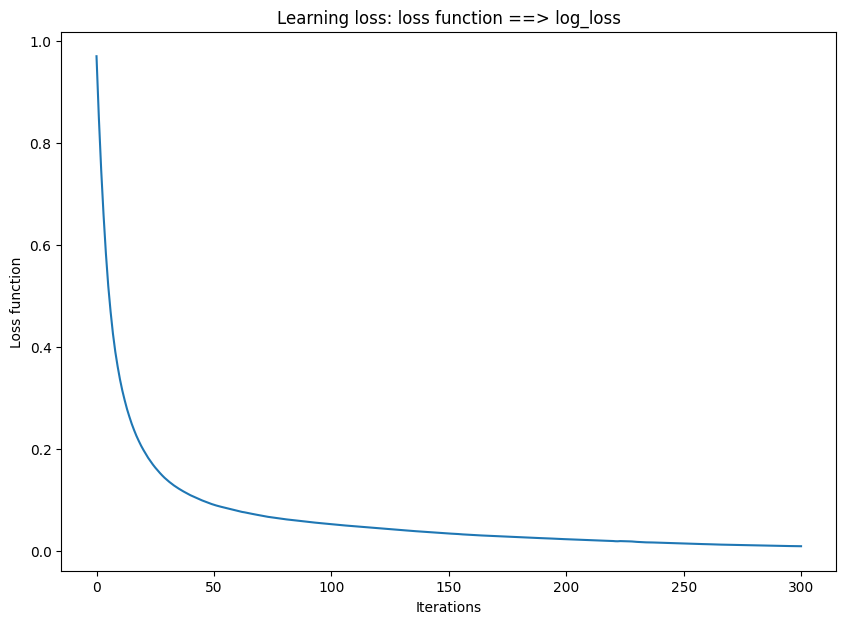

In [8]:
# Utilisation d'un réseau de neurones multi-perceptron pour la classification

# Taille des différentes couches cachés
taille_couches_cachees = (30, 10)

# Définition du réseau de neurones
mlp = MLPClassifier(hidden_layer_sizes=taille_couches_cachees,
                    max_iter=2000, 
                    random_state=42)

# Entrainement du réseau défini sur les données d'apprentissage
mlp.fit(features_train, classes_train)

# Détails sur les différentes couches
print("Nombre de couches du MLP: {}".format(mlp.n_layers_))
print("Nombre de couches cachées : {}\n".format(len(taille_couches_cachees)))

# Fonction d'activation de sortie
print("Output activation function: {}\n".format(mlp.out_activation_))

# Inspection visuelle de la fonction de coût pendant l'apprentissage
display_training_curves(mlp)
    
# Quelle proportion de la base d'apprentissage a été vue 
print("Proportion du train utilisée : {}\n".format((mlp.t_/len(mlp.loss_curve_))/features_train.shape[0]))



---
# TO DO
--- 
## Modifier les paramètres suivants en vous inspirant de la cellule ci-dessus
- hidden_layer_sizes avec tous les autres paramètres inchangés
- max_iter (une valeur petite < 5) avec tous les autres paramètres inchangés
- batch_size (une valeur à 1 et une valeur égale à la taille de l'ensemble d'apprentissage) avec tous les autres paramètres inchangés
- (bonus) early_stopping à vrai et faux que remarquez vous ?
Note: pour *early_stopping=True*, modifier validation_fraction : 0.1 et 0.2


In [9]:
# Ici vos différents implémentations de MLP

## Entrainement d'un MLP pour la suite du TP

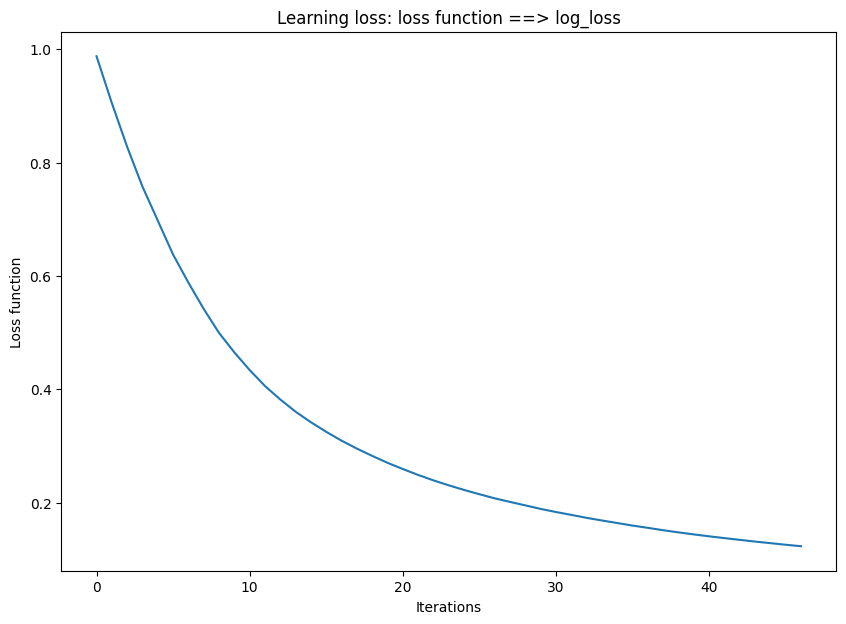

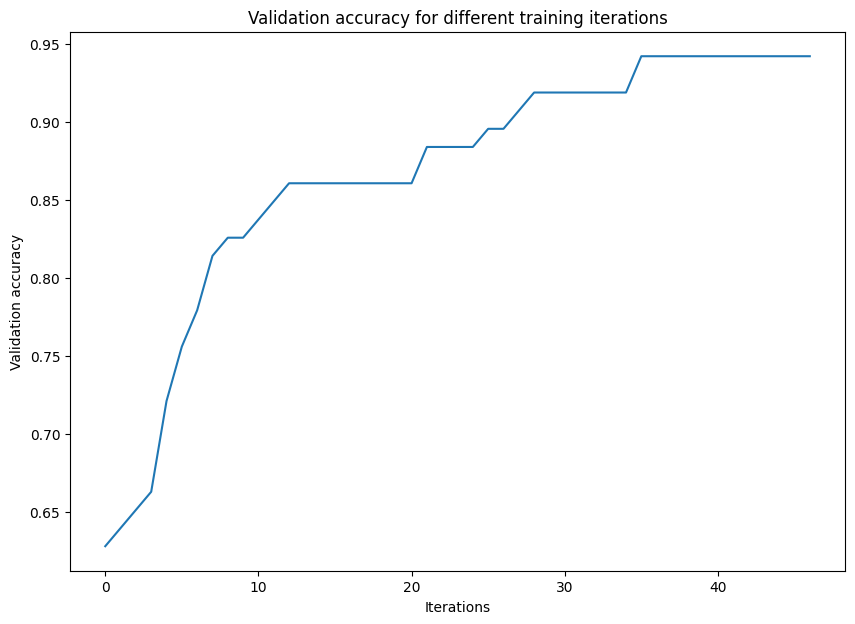

In [10]:
# re-définition du réseau de neurones (pour que tout le monde partage le même réseau)
mlp = MLPClassifier(hidden_layer_sizes=(30, 10),
                    max_iter=2000, 
                    random_state=42, 
                    early_stopping=True,
                    batch_size=200,
                    validation_fraction=0.2)

# Entrainement du réseau défini sur les données d'apprentissage
mlp.fit(features_train, classes_train)

# Inspection visuelle de l'entraitement
display_training_curves(mlp)

### Evaluation de l'apprentissage sur les données de test
Pour évaluer la qualité de l'apprentissage, on peut utiliser plusieurs métriques. Dans cet exemple, nous utiliserons :
- la matrice de confusion
- la précision
- le recall
- le score F1

Ces différentes métriques sont déjà implémentées dans le module `metrics` du package ***scikit-learn***.

In [11]:
predictions_test = mlp.predict(features_test)

print("Matrice de confusion")
mlp_confusion_matrix = confusion_matrix(classes_test, predictions_test)

print(confusion_matrix(classes_test, predictions_test))

Matrice de confusion
[[51  3]
 [ 4 85]]


In [12]:
print(mlp.score(features_test, classes_test))
predictions_test = mlp.predict(features_test)
print(classification_report(classes_test, predictions_test))

0.951048951048951
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [13]:
print(classification_report(classes_test, predictions_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



### Validation croisée 
La validation croissée est une approche permettant d'entraîner le modèle plusieurs fois sur des sous-échantillons de la base d'apprentissage. Elle permet de s'assurer que le modèle ne fonctionne pas uniquement dans une seule configuration de l'ensemble d'apprentissage. On peut par la suite sélectionner le modèle qui offre la meilleure précision, le meilleur recall, ...

Nous avons effecutée une validation croissée avec la fonction `cross_val_score` du module `model_selction` du package ***scikit-learn***. Il faut indiquer à cette fonction :
- le nombre de validations croisées qu'on souhaite effectuer avec le paramètre `cv`
- la métrique d'évaluation de la validation croisée avec le paramètre `scoring`

In [14]:
mlp_cross_val_score = cross_val_score(mlp , features_train, classes_train, cv=5, scoring="accuracy")
print(mlp_cross_val_score)

[0.8372093  0.92941176 0.91764706 0.91764706 0.94117647]


---
# Fin
---